In [56]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import OLS, add_constant

from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.api import OLS, add_constant

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer

from patsy import dmatrix


import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [58]:
path = "/content/drive/MyDrive/DSLab/Assignment2/Real estate valuation data set.xlsx"

In [59]:
df = pd.read_excel(path)

In [60]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [61]:
# printing the attributes or feature names of the dataset
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [62]:
df['Cent_dist'] = ((df['X5 latitude'])**2 + (df['X6 longitude'])**2)**0.5
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Cent_dist
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,124.081341
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,124.080095
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,124.085838
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,124.085838
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,124.082779


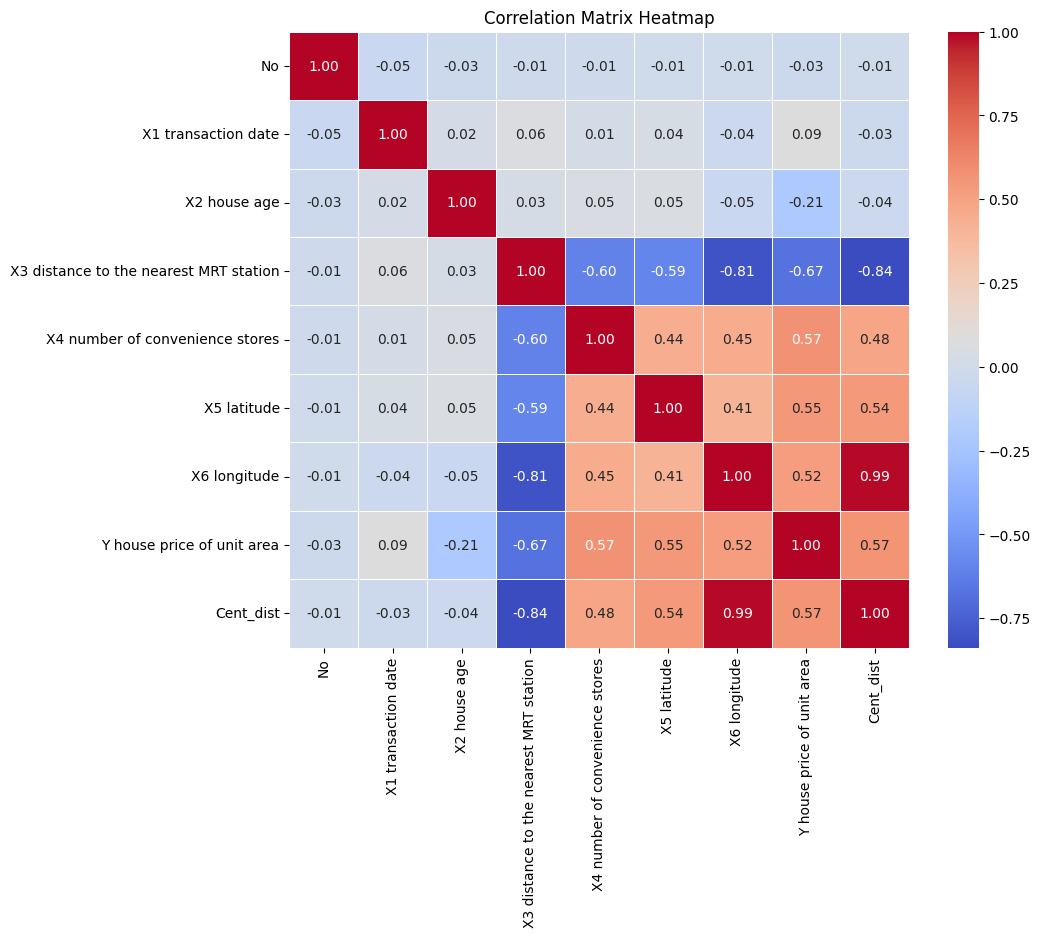

In [63]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
# Transaction date doesn't have correlation with any of the other variables and also the dependant variable.
# Along with this using the domain knowledge the transaction date of a property won't have impact on the price of the property. So, dropping the column transaction date

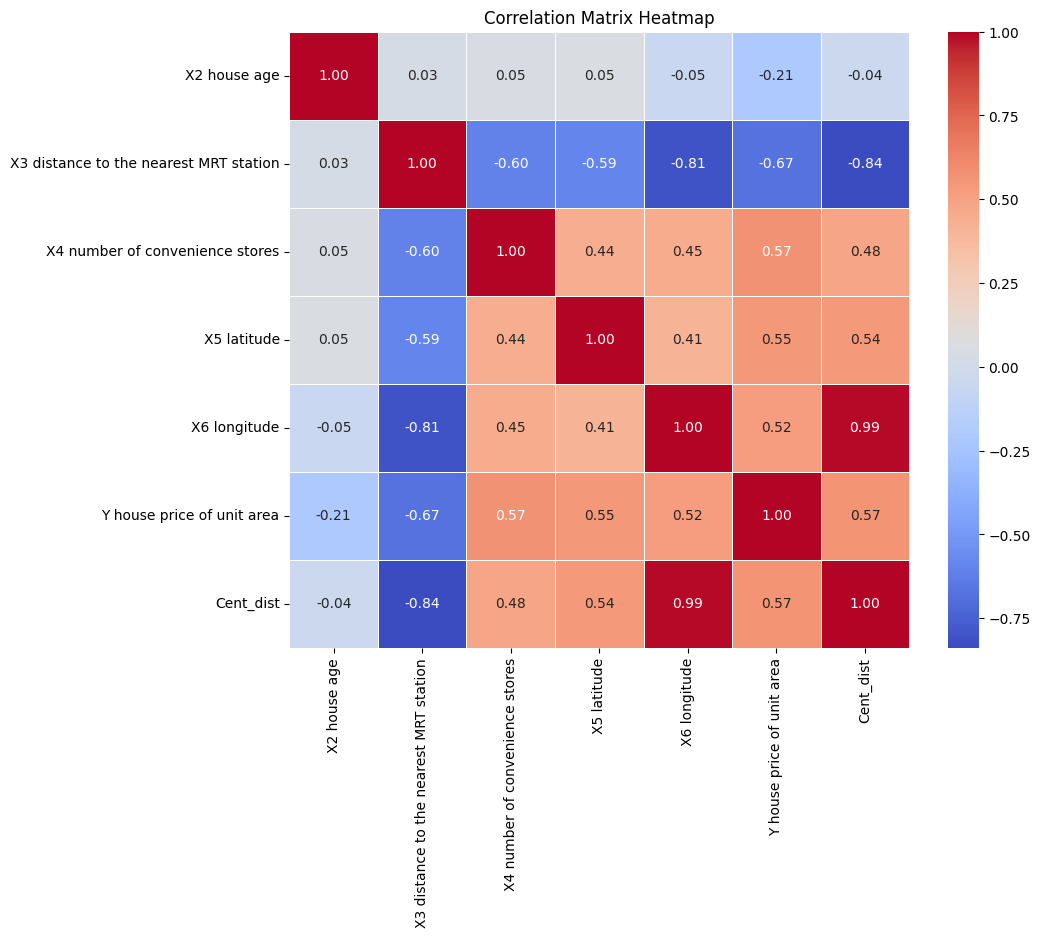

In [65]:
df.drop(columns=['No', 'X1 transaction date'],axis=1,inplace=True)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [66]:
# Since longitude has very high correlation with the distance from the metro station we are dropping the column longitude to avoid multi-collinearity

# Here we are performing the analysis to check the outliers in each of the attributes
bold text

In [67]:
q1 = df['X2 house age'].quantile(0.25)
q3 = df['X2 house age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_X2_house_age = df[(df['X2 house age'] < lower_bound) | (df['X2 house age'] > upper_bound)]
print("Outlier Rows:")
print(len(outliers_X2_house_age))


Outlier Rows:
0


In [68]:
q1 = df['X4 number of convenience stores'].quantile(0.25)
q3 = df['X4 number of convenience stores'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_X4_number_of_convenience_stores = df[(df['X4 number of convenience stores'] < lower_bound) | (df['X4 number of convenience stores'] > upper_bound)]
print("Outlier Rows:")
print(len(outliers_X4_number_of_convenience_stores))

Outlier Rows:
0


In [69]:
q1 = df['Y house price of unit area'].quantile(0.25)
q3 = df['Y house price of unit area'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_Y_house_price_of_unit_area = df[(df['Y house price of unit area'] < lower_bound) | (df['Y house price of unit area'] > upper_bound)]
print("Outlier Rows:")
print(len(outliers_Y_house_price_of_unit_area))
print(outliers_Y_house_price_of_unit_area['Y house price of unit area'])

Outlier Rows:
3
220     78.3
270    117.5
312     78.0
Name: Y house price of unit area, dtype: float64


# Plotting the various variables and checking their distribution


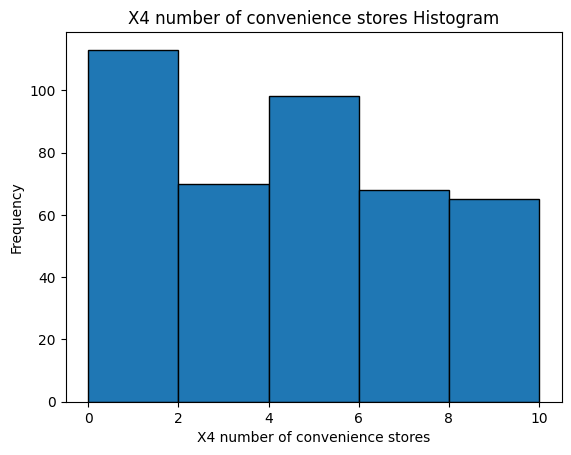

In [70]:
plt.hist(df['X4 number of convenience stores'], bins=5, edgecolor='black')  # Adjust bins as needed
plt.title('X4 number of convenience stores Histogram')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Frequency')
plt.show()

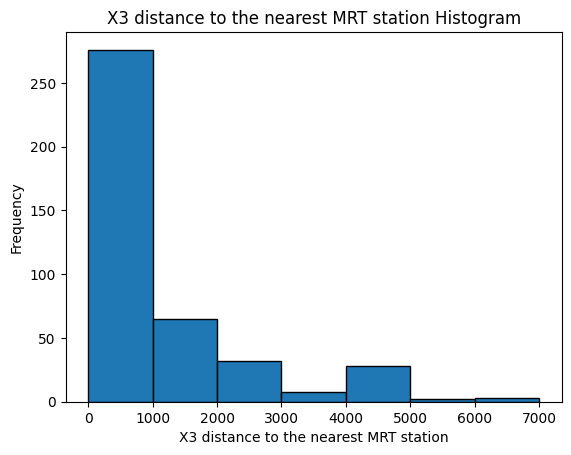

In [71]:
bin_edges = range(0, int(df['X3 distance to the nearest MRT station'].max()) + 1000, 1000)  # Define bin edges with a step of 10


plt.hist(df['X3 distance to the nearest MRT station'], bins=bin_edges, edgecolor='black')  # Adjust bins as needed
plt.title('X3 distance to the nearest MRT station Histogram')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Frequency')
plt.show()

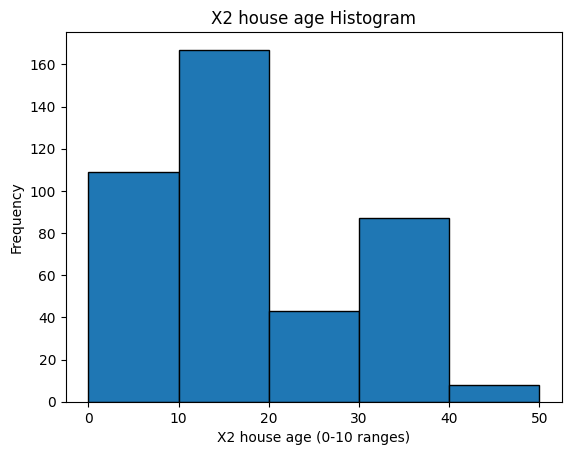

In [72]:
bin_edges = range(0, int(df['X2 house age'].max()) + 10, 10)  # Define bin edges with a step of 10

# Plot the histogram
plt.hist(df['X2 house age'], bins=bin_edges, edgecolor='black')
plt.title('X2 house age Histogram')
plt.xlabel('X2 house age (0-10 ranges)')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Ensure the x-axis shows the bin edges
plt.show()


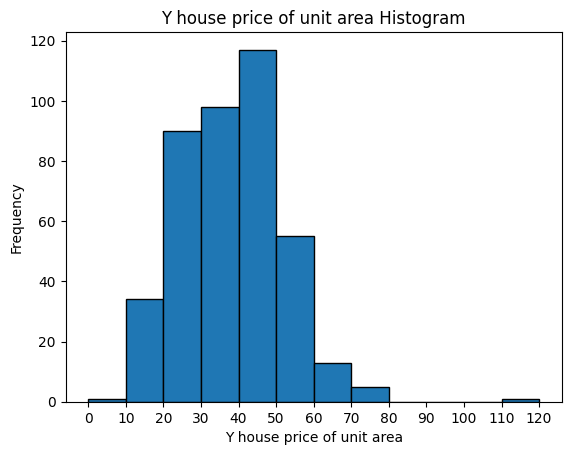

In [73]:
bin_edges = range(0, int(df['Y house price of unit area'].max()) + 10, 10)  # Define bin edges with a step of 10

# Plot the histogram
plt.hist(df['Y house price of unit area'], bins=bin_edges, edgecolor='black')
plt.title('Y house price of unit area Histogram')
plt.xlabel('Y house price of unit area')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Ensure the x-axis shows the bin edges
plt.show()

# Removing the outliers using price per unit area


1.   currently we are removing the outliers directly
2.   Next we can apply the log transformation and handle the same



In [74]:
# removing the outliers using the attribute "Y house price of unit area"

q1 = df['Y house price of unit area'].quantile(0.25)
q3 = df['Y house price of unit area'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_cleaned= df[~((df['Y house price of unit area'] < lower_bound) | (df['Y house price of unit area'] > upper_bound))]


In [75]:
df_cleaned.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'Cent_dist'],
      dtype='object')

In [76]:
df_cleaned.shape

(411, 7)

# Standardizing the columns
Deriving a new feature using X and Y co ordinates - distance from the centroid of all the cities and re running the model

In [77]:
columns_to_standardize = [ 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Cent_dist']
scaler = StandardScaler()

df_cleaned_stand = scaler.fit_transform(df_cleaned[columns_to_standardize])
df_cleaned_stand = pd.DataFrame(df_cleaned_stand, columns=columns_to_standardize)

df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned_stand.reset_index(drop=True, inplace=True)
df_cleaned_stand['Y house price of unit area'] = df_cleaned['Y house price of unit area']

df_cleaned_stand

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Cent_dist,Y house price of unit area
0,1.266321,-0.795684,2.022036,1.125198,0.449647,0.589862,37.9
1,0.164104,-0.620159,1.680599,0.912821,0.402160,0.513154,42.2
2,-0.382595,-0.417976,0.314853,1.485595,0.688382,0.866579,47.3
3,-0.382595,-0.417976,0.314853,1.485595,0.688382,0.866579,54.8
4,-1.114467,-0.553680,0.314853,0.834789,0.593408,0.678346,43.1
...,...,...,...,...,...,...,...
406,-0.347324,2.368714,-1.392330,-2.207672,-1.920138,-2.118977,15.4
407,-1.061560,-0.791269,1.680599,0.429342,0.635691,0.655097,50.0
408,0.102380,-0.553362,0.997726,0.823526,0.424928,0.520500,40.6
409,-0.841117,-0.779905,0.314853,-0.181242,0.477619,0.414635,52.5


# introducing log of the predicted price

In [78]:
df_cleaned_stand['Y house price of unit area log transformed'] = np.log(df_cleaned_stand['Y house price of unit area'])

In [79]:
df_cleaned_stand.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Cent_dist', 'Y house price of unit area',
       'Y house price of unit area log transformed'],
      dtype='object')

# Linear Regression fitting

Directly fitting the linear regression model using all the given attributes for preliminary understanding of the fit

In [80]:
regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude'
]

X = df_cleaned_stand[regression_variables]
y = df_cleaned_stand['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_r2_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')
cv_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

lr_model.fit(X_train, y_train)

y_test_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

percentage_accuracy = 100 - mape

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
print("Coefficients:")
print(coefficients)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

print(f"\n{k}-Fold Cross-Validation Results:")
print(f"Average R² Score (Train): {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE (Train): {-np.mean(cv_mse_scores):.4f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_r2_scores):.4f}")


Coefficients:
                                  Feature  Coefficient
0                            X2 house age    -3.275417
1  X3 distance to the nearest MRT station    -5.614933
2         X4 number of convenience stores     3.425591
3                             X5 latitude     2.951519

Model Evaluation:
Mean Squared Error (MSE): 77.3363
Mean Absolute Error (MAE): 5.9072
R² Score: 0.4432
Mean Absolute Percentage Error (MAPE): 23.52%
Percentage Accuracy: 76.48%

5-Fold Cross-Validation Results:
Average R² Score (Train): 0.6585
Average MSE (Train): 56.8090
Standard Deviation of R² Scores: 0.0232


In [81]:
variance_house_price = df_cleaned_stand['Y house price of unit area'].var()
print(f"The variance of Y house price of unit area is: {variance_house_price}")

The variance of Y house price of unit area is: 163.04519138330062


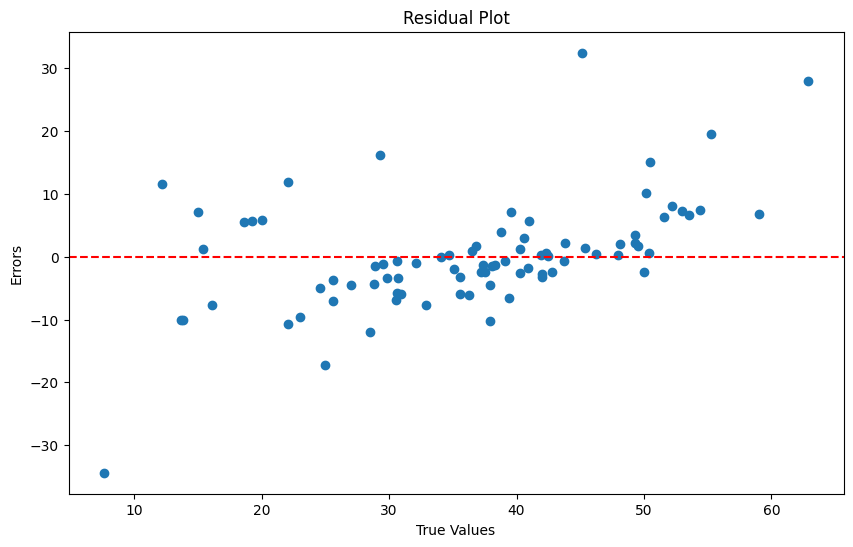

In [82]:
errors = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Errors")
plt.title("Residual Plot")
plt.show()


In [83]:
# The errors in the above plot are showing a pattern along with increasing variance showing heteroscedasticity which is violating the basic assumtion of Linear regression i.e.,
# the errors shpouldn't follow a pattern and they should show a homoscedasticity rather heteroscedasticity, So applying log transformation to ensure the basic assumptions

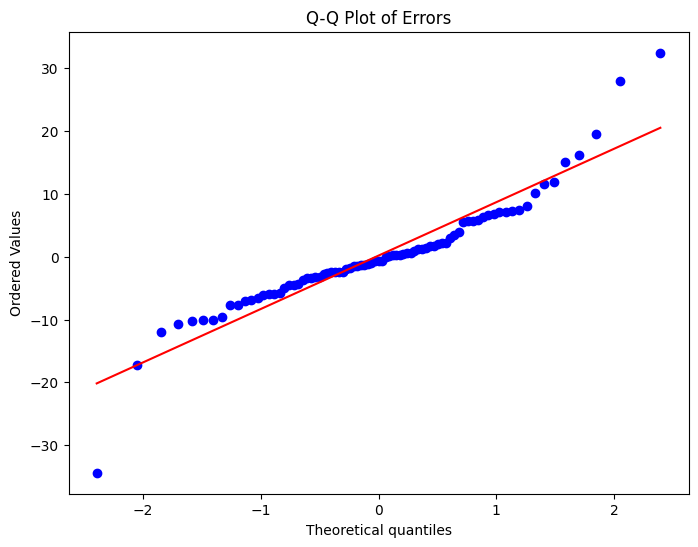

In [84]:
import statsmodels.api as sm
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(errors, dist="norm", plot=plt)
plt.title("Q-Q Plot of Errors")
plt.show()

# Creating a new categorical variable "city_or_non_city" using the cooks distance

In [85]:


regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude'
]

X = df_cleaned_stand[regression_variables]
y = df_cleaned_stand['Y house price of unit area']

X_with_constant = add_constant(X)
ols_model = OLS(y, X_with_constant).fit()

influence = ols_model.get_influence()
cooks_d, pvals = influence.cooks_distance

threshold = 4 / len(X)
abnormal_points = np.where(cooks_d > threshold)[0]

print(f"Number of influential points identified: {len(abnormal_points)}")
print(f"Indices of influential points: {abnormal_points}")

df_cleaned_stand['city_or_non_city'] = 'city'
df_cleaned_stand.loc[abnormal_points, 'city_or_non_city'] = 'non-city'

print("\nDistribution of 'city_or_non_city':")
print(df_cleaned_stand['city_or_non_city'].value_counts())

X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_r2_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')
cv_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

lr_model.fit(X_train, y_train)

y_test_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

percentage_accuracy = 100 - mape

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
print("Coefficients:")
print(coefficients)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

print(f"\n{k}-Fold Cross-Validation Results:")
print(f"Average R² Score (Train): {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE (Train): {-np.mean(cv_mse_scores):.4f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_r2_scores):.4f}")


Number of influential points identified: 25
Indices of influential points: [  8  15  16  31  35  47 105 113 116 126 128 148 164 166 194 227 254 323
 331 341 358 376 379 383 386]

Distribution of 'city_or_non_city':
city_or_non_city
city        386
non-city     25
Name: count, dtype: int64
Coefficients:
                                  Feature  Coefficient
0                            X2 house age    -3.325127
1  X3 distance to the nearest MRT station    -6.439969
2         X4 number of convenience stores     3.496275
3                             X5 latitude     2.118004
4                        city_or_non_city    16.775618

Model Evaluation:
Mean Squared Error (MSE): 80.7165
Mean Absolute Error (MAE): 5.4569
R² Score: 0.4189
Mean Absolute Percentage Error (MAPE): 24.52%
Percentage Accuracy: 75.48%

5-Fold Cross-Validation Results:
Average R² Score (Train): 0.7349
Average MSE (Train): 44.3651
Standard Deviation of R² Scores: 0.0610


<ipython-input-85-c2d8691b786a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)


# Applying log to the target / response variable and analyzing the fit

In [86]:
regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude'
]

X = df_cleaned_stand[regression_variables]
y = df_cleaned_stand['Y house price of unit area log transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_r2_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')
cv_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

lr_model.fit(X_train, y_train)

y_test_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
percentage_accuracy = 100 - mape

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
print("Coefficients:")
print(coefficients)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

print(f"\n{k}-Fold Cross-Validation Results:")
print(f"Average R² Score (Train): {np.mean(cv_r2_scores):.4f}")
print(f"Average MSE (Train): {-np.mean(cv_mse_scores):.4f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_r2_scores):.4f}")


Coefficients:
                                  Feature  Coefficient
0                            X2 house age    -0.080998
1  X3 distance to the nearest MRT station    -0.202181
2         X4 number of convenience stores     0.077488
3                             X5 latitude     0.099762

Model Evaluation:
Mean Squared Error (MSE): 0.0886
Mean Absolute Error (MAE): 0.1722
R² Score: 0.4376
Mean Absolute Percentage Error (MAPE): 5.48%
Percentage Accuracy: 94.52%

5-Fold Cross-Validation Results:
Average R² Score (Train): 0.7521
Average MSE (Train): 0.0359
Standard Deviation of R² Scores: 0.0312


From above two regressions , we can observe that the R2 value is remainng the same as 0.4551 and 0.4562 when we are fitting a linear model to the data

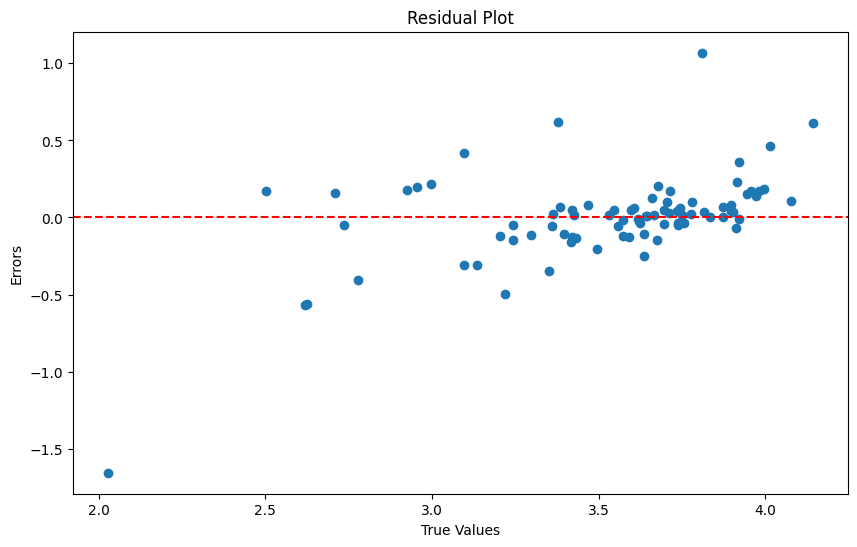

In [87]:
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("True Values")
plt.ylabel("Errors")
plt.title("Residual Plot")
plt.show()


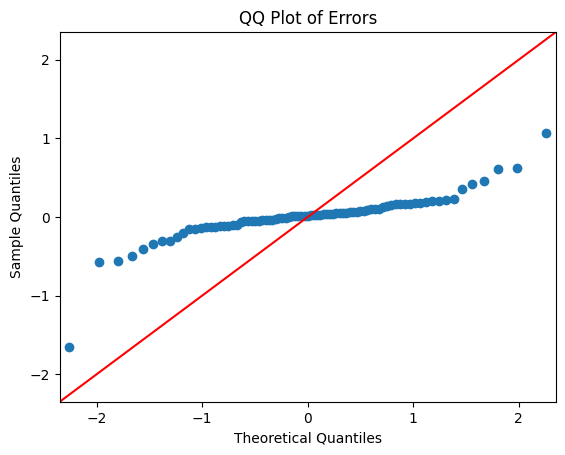

In [88]:
errors = y_test - y_test_pred
fig = sm.qqplot(errors, line='45')
plt.title("QQ Plot of Errors")
plt.show()

In [89]:

# After applying a log transformation did not resolve the issue of errors following a pattern and has introduced new problems (like non-normality of residuals),
# it indicates that linear regression might not be the best approach for this data. So, we are trying the Polynomial regression


# plotting the variation of "Y house price of unit area" vs all other variables

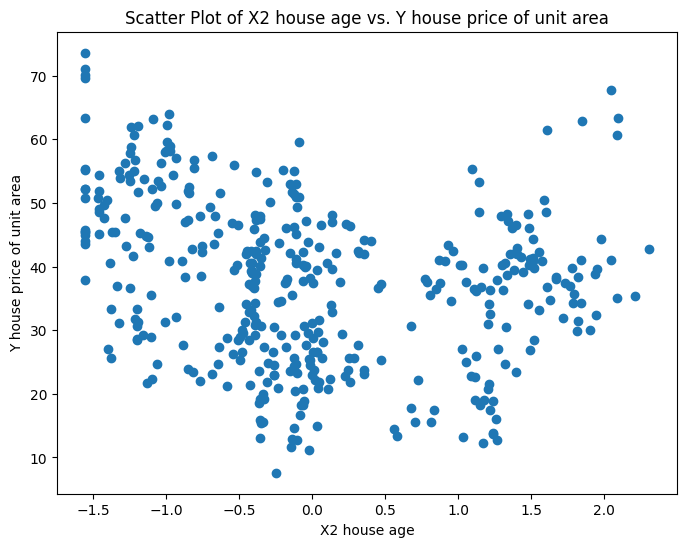

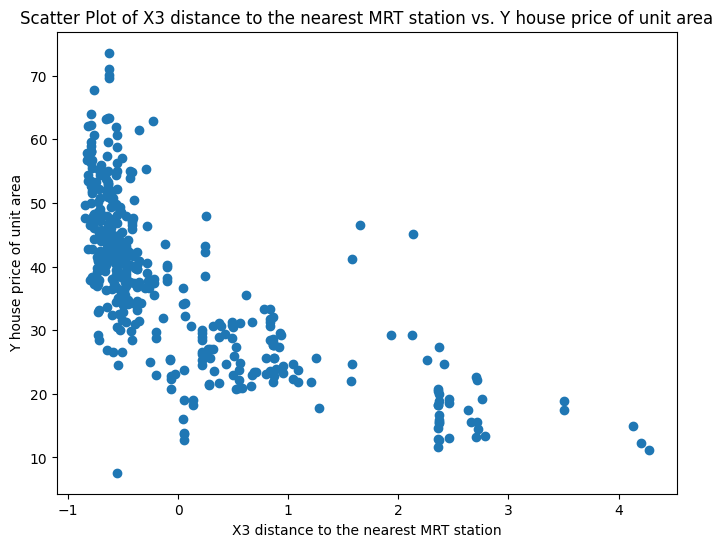

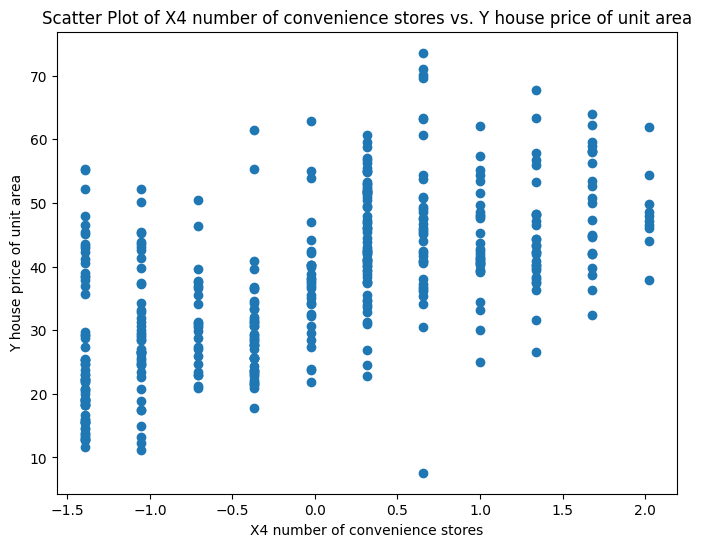

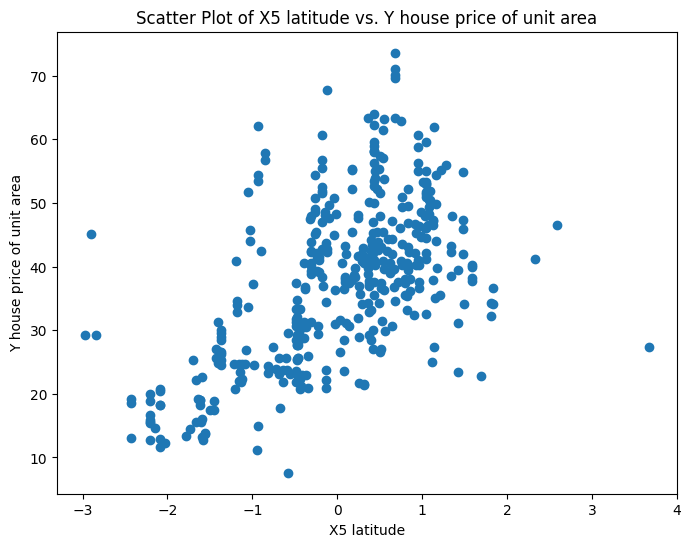

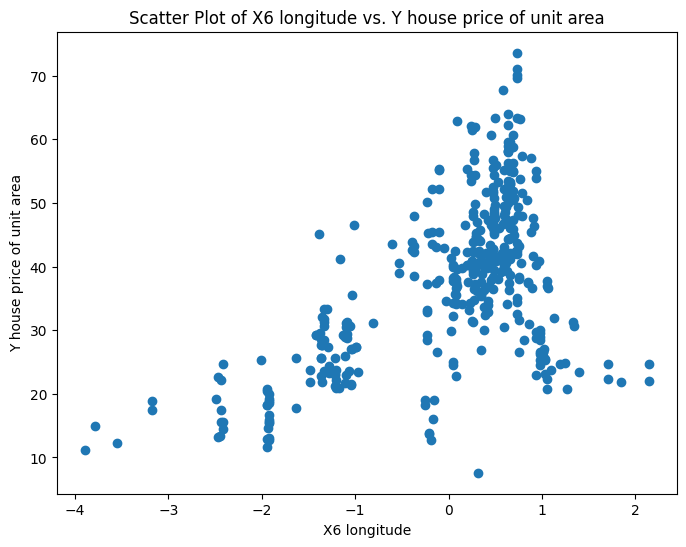

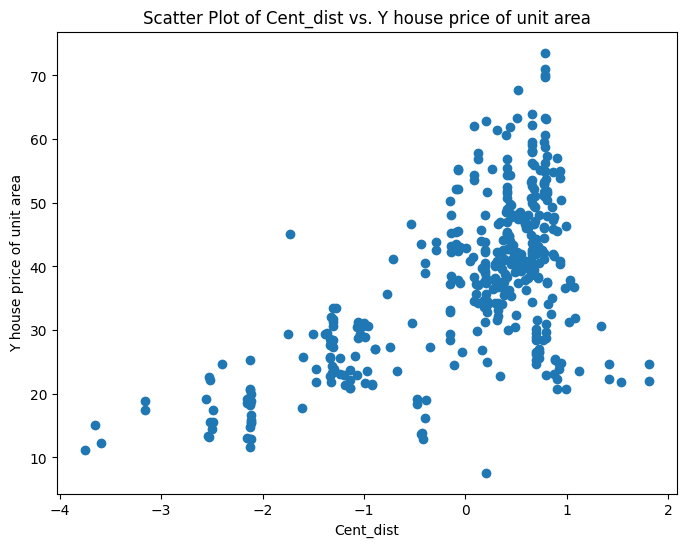

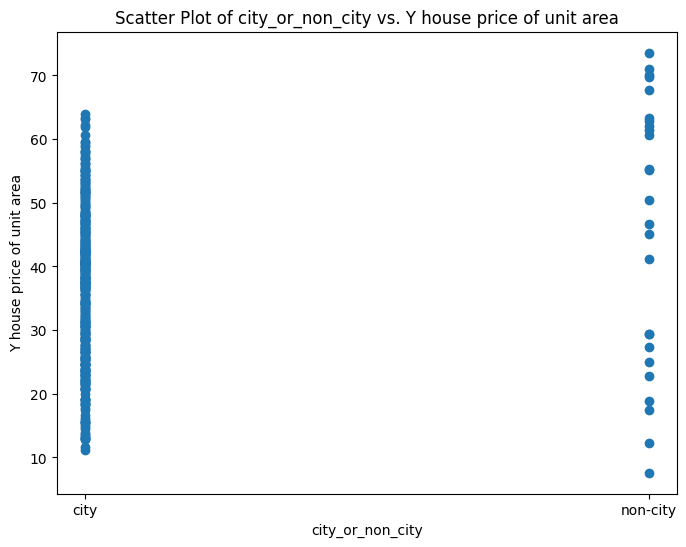

In [90]:
import matplotlib.pyplot as plt
for col in df_cleaned_stand.columns:
    if col != 'Y house price of unit area' and col != 'Y house price of unit area log transformed' and col != 'Y house price of unit area_normalized':
        plt.figure(figsize=(8, 6))
        plt.scatter(df_cleaned_stand[col], df_cleaned_stand['Y house price of unit area'])
        plt.xlabel(col)
        plt.ylabel('Y house price of unit area')
        plt.title(f'Scatter Plot of {col} vs. Y house price of unit area')
        plt.show()

In [91]:
 # From the above visualisations we can see that the relationship between dependant and independant variables is mostly polynomial, we can try using a polynomial regression

# Directly fitting a polynomial regression of order 2

In [92]:
regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude'
]

X = df_cleaned_stand[regression_variables]
y = df_cleaned_stand['Y house price of unit area']

X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_feature_names = poly.get_feature_names_out(X.columns)

lr_model = LinearRegression()

lr_model.fit(X_train_poly, y_train)

y_train_pred = lr_model.predict(X_train_poly)
y_test_pred = lr_model.predict(X_test_poly)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

X_poly = poly.fit_transform(X)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(lr_model, X_poly, y, scoring='r2', cv=kf)

coefficients = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': lr_model.coef_})
print("Coefficients:")
print(coefficients)

intercept = lr_model.intercept_
equation = f"{intercept:.4f}"
for feature, coef in zip(poly_feature_names, lr_model.coef_):
    equation += f" + ({coef:.4f} * {feature})"
print("\nPolynomial Equation:")
print(f"Y = {equation}")

print("\nTraining Data Evaluation:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")

print("\nTest Data Evaluation:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")

avg_r2 = np.mean(cv_r2_scores)
print(f"\n5-Fold Cross-Validation Results:")
print(f"Average R² Score: {avg_r2:.4f}")
print(f"Standard Deviation of R²: {np.std(cv_r2_scores):.4f}")

if train_r2 - test_r2 > 0.15:
    print("\nWarning: The model may be overfitting. Significant difference between training and test R².")
else:
    print("\nThe model does not appear to be overfitting.")

Coefficients:
                                              Feature  Coefficient
0                                                   1     0.000000
1                                        X2 house age    -3.535042
2              X3 distance to the nearest MRT station   -12.297956
3                     X4 number of convenience stores     0.064390
4                                         X5 latitude     3.672749
5                                    city_or_non_city     7.364992
6                                      X2 house age^2     1.233277
7   X2 house age X3 distance to the nearest MRT st...    -0.049251
8        X2 house age X4 number of convenience stores    -0.525769
9                            X2 house age X5 latitude    -0.906355
10                      X2 house age city_or_non_city     1.278687
11           X3 distance to the nearest MRT station^2     0.107754
12  X3 distance to the nearest MRT station X4 numb...    -5.828480
13  X3 distance to the nearest MRT station X5 la

<ipython-input-92-820699d9d54e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)


R2 value from the above Polynomial regression fit is 0.54, but the model has slightly overfit as on the training data, the model has performed well but on testing data the accuracy has reduced, so we are using lasso and ridge to nullify some of the co-efficients to remove the overfit problem

# Lasso Ridge  + Polynomial regression

In [93]:
regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude'
]

X = df_cleaned_stand[regression_variables]
y = df_cleaned_stand['Y house price of unit area']

X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_feature_names = poly.get_feature_names_out(X.columns)

param_grid = {'alpha': np.logspace(-3, 3, 10)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=kf)
ridge_grid.fit(X_train_poly, y_train)
best_ridge = ridge_grid.best_estimator_

ridge_cv_r2_scores = cross_val_score(best_ridge, X_train_poly, y_train, scoring='r2', cv=kf)
ridge_train_r2 = best_ridge.score(X_train_poly, y_train)
ridge_test_r2 = best_ridge.score(X_test_poly, y_test)
ridge_test_pred = best_ridge.predict(X_test_poly)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

print("\n--- Ridge Regression ---")
print(f"Optimal Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Training R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")
print(f"Test MSE: {ridge_test_mse:.4f}")
print(f"Average R² (5-Fold CV): {np.mean(ridge_cv_r2_scores):.4f}")
print(f"Standard Deviation of R² (5-Fold CV): {np.std(ridge_cv_r2_scores):.4f}")

lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=kf)
lasso_grid.fit(X_train_poly, y_train)
best_lasso = lasso_grid.best_estimator_

lasso_cv_r2_scores = cross_val_score(best_lasso, X_train_poly, y_train, scoring='r2', cv=kf)
lasso_train_r2 = best_lasso.score(X_train_poly, y_train)
lasso_test_r2 = best_lasso.score(X_test_poly, y_test)
lasso_test_pred = best_lasso.predict(X_test_poly)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("\n--- Lasso Regression ---")
print(f"Optimal Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Training R²: {lasso_train_r2:.4f}")
print(f"Test R²: {lasso_test_r2:.4f}")
print(f"Test MSE: {lasso_test_mse:.4f}")
print(f"Average R² (5-Fold CV): {np.mean(lasso_cv_r2_scores):.4f}")
print(f"Standard Deviation of R² (5-Fold CV): {np.std(lasso_cv_r2_scores):.4f}")

ridge_intercept = best_ridge.intercept_
ridge_equation = f"{ridge_intercept:.4f}"
for feature, coef in zip(poly_feature_names, best_ridge.coef_):
    ridge_equation += f" + ({coef:.4f} * {feature})"
print("\nPolynomial Equation (Ridge):")
print(f"Y = {ridge_equation}")

lasso_intercept = best_lasso.intercept_
lasso_equation = f"{lasso_intercept:.4f}"
for feature, coef in zip(poly_feature_names, best_lasso.coef_):
    if coef != 0:
        lasso_equation += f" + ({coef:.4f} * {feature})"
print("\nPolynomial Equation (Lasso):")
print(f"Y = {lasso_equation}")

<ipython-input-93-8d34049e7df9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city_or_non_city'] = (df_cleaned_stand['city_or_non_city'] == 'non-city').astype(int)



--- Ridge Regression ---
Optimal Alpha: 2.154434690031882
Training R²: 0.8392
Test R²: 0.5421
Test MSE: 63.6059
Average R² (5-Fold CV): 0.8011
Standard Deviation of R² (5-Fold CV): 0.0292

--- Lasso Regression ---
Optimal Alpha: 0.1
Training R²: 0.8350
Test R²: 0.5543
Test MSE: 61.9053
Average R² (5-Fold CV): 0.8049
Standard Deviation of R² (5-Fold CV): 0.0214

Polynomial Equation (Ridge):
Y = 32.9080 + (0.0000 * 1) + (-3.5180 * X2 house age) + (-11.4702 * X3 distance to the nearest MRT station) + (0.6438 * X4 number of convenience stores) + (3.5003 * X5 latitude) + (6.7048 * city_or_non_city) + (1.3617 * X2 house age^2) + (0.1106 * X2 house age X3 distance to the nearest MRT station) + (-0.4628 * X2 house age X4 number of convenience stores) + (-0.8948 * X2 house age X5 latitude) + (1.0521 * X2 house age city_or_non_city) + (0.1488 * X3 distance to the nearest MRT station^2) + (-4.7794 * X3 distance to the nearest MRT station X4 number of convenience stores) + (-2.3316 * X3 distance 

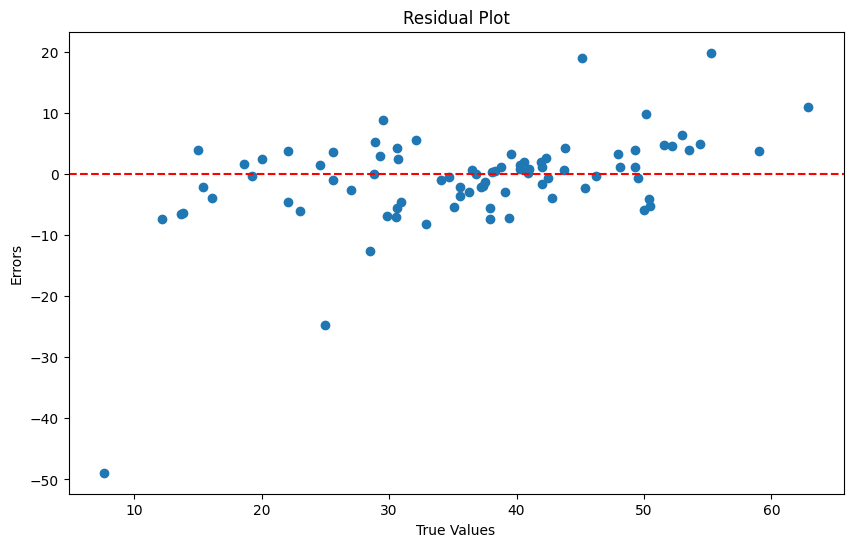

In [94]:
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("True Values")
plt.ylabel("Errors")
plt.title("Residual Plot")
plt.show()


In [95]:
#Here Errors are not following any pattern confirming the basic linear assumption
# Even after appling the ridge and lasso the data is still in Overfit, so we are tring the feature selection using forward feature selection
# to remove the unnecessary independent variables so that the model doesn't overfit

# forward feature selection in polynomial regression with order 2 ,  

In [96]:
# Define features (X) and target (y)
regression_variables = [
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude',
    # 'X6 longitude'
]

# Features (X) and Target (y)
X = df_cleaned_stand[regression_variables]  # Only numerical features
y = df_cleaned_stand['Y house price of unit area']  # Target variable

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate Polynomial Features (degree=3 for cubes and interactions)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)  # Only numeric features
X_poly_test = poly.transform(X_test)

# Get feature names for polynomial terms
poly_feature_names = poly.get_feature_names_out(regression_variables)

# Forward Feature Selection with VIF Check
selected_features = []
remaining_features = list(range(X_poly_train.shape[1]))
best_r2 = -np.inf
max_features = 25  # Limit to 25 features

while len(selected_features) < max_features and remaining_features:
    r2_scores = []
    for feature_idx in remaining_features:
        # Temporarily add the feature
        temp_features = selected_features + [feature_idx]
        temp_model = LinearRegression()
        temp_model.fit(X_poly_train[:, temp_features], y_train)
        temp_r2 = r2_score(y_test, temp_model.predict(X_poly_test[:, temp_features]))
        r2_scores.append((temp_r2, feature_idx))

    # Select the feature with the highest R² improvement
    r2_scores.sort(reverse=True, key=lambda x: x[0])
    best_r2_candidate, best_feature_idx = r2_scores[0]

    # Add feature if R² improves significantly
    if best_r2_candidate - best_r2 > 0.001:
        selected_features.append(best_feature_idx)
        remaining_features.remove(best_feature_idx)
        best_r2 = best_r2_candidate

        # Check VIF and remove features with VIF > 10
        if len(selected_features) > 1:  # VIF requires at least 2 features to calculate
            X_selected = X_poly_train[:, selected_features]
            vif = [variance_inflation_factor(X_selected, i) for i in range(X_selected.shape[1])]
            if max(vif) > 10:
                print(f"Removing feature {poly_feature_names[selected_features[np.argmax(vif)]]} due to high VIF ({max(vif):.2f})")
                del selected_features[np.argmax(vif)]

        print(f"Added Feature: {poly_feature_names[best_feature_idx]}, R²: {best_r2:.4f}")
    else:
        break

# Handle the case where no features are selected
if len(selected_features) == 0:
    raise ValueError("No features were selected due to high VIF or low R² improvement.")

print(f"\nSelected {len(selected_features)} features out of {max_features} allowed.")

# Train the final model with selected features
final_model = LinearRegression()
final_model.fit(X_poly_train[:, selected_features], y_train)

# Evaluate the final model on test data
y_test_pred = final_model.predict(X_poly_test[:, selected_features])
final_test_mse = mean_squared_error(y_test, y_test_pred)
final_test_r2 = r2_score(y_test, y_test_pred)
final_test_mae = mean_absolute_error(y_test, y_test_pred)
final_test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100  # MAPE

# Evaluate the final model on training data
y_train_pred = final_model.predict(X_poly_train[:, selected_features])
final_train_r2 = r2_score(y_train, y_train_pred)

# Use statsmodels to print summary
X_train_full_sm = sm.add_constant(X_poly_train[:, selected_features])  # Add constant for intercept
ols_model = sm.OLS(y_train, X_train_full_sm).fit()
summary = ols_model.summary()

# Print the summary
print(summary)

# Print evaluation metrics
print("\nFinal Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {final_test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {final_test_mae:.4f}")
print(f"R² Score: {final_test_r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {final_test_mape:.2f}%")

print("\nFinal Model Evaluation on Training Data:")
print(f"R² Score: {final_train_r2:.4f}")



Added Feature: X5 latitude, R²: 0.2899
Added Feature: X2 house age X5 latitude^2, R²: 0.3604
Added Feature: X4 number of convenience stores, R²: 0.4159
Added Feature: X2 house age X4 number of convenience stores^2, R²: 0.4723
Added Feature: X5 latitude^3, R²: 0.5214
Added Feature: X4 number of convenience stores X5 latitude, R²: 0.5434
Added Feature: X2 house age X4 number of convenience stores, R²: 0.5519
Added Feature: X2 house age^2 X3 distance to the nearest MRT station, R²: 0.5596
Added Feature: X2 house age X3 distance to the nearest MRT station, R²: 0.5981
Added Feature: X4 number of convenience stores X5 latitude^2, R²: 0.6032
Added Feature: X3 distance to the nearest MRT station X4 number of convenience stores^2, R²: 0.6141
Added Feature: X2 house age^2, R²: 0.6161
Added Feature: X2 house age, R²: 0.6184
Added Feature: X2 house age^3, R²: 0.6209
Added Feature: X3 distance to the nearest MRT station^2 X4 number of convenience stores, R²: 0.6233
Removing feature X3 distance to t

From the above we can say that the model hasn't over fit and also performed better on the test data with R2 of 0.62.

Summary:

We are given the data set on house price prediction, for which we have tried different models to get the better prediction like Linear Models but since the assumtions like errors following a pattern and homoscedasticity are violated we have gone for the log transformation of dependant variable but the issue persisted even after that. So, we tried the Polynomial regression, R2 improved using this but the model is over fitting , so we used Sparse methods like Ridge and Lasoo regression but still the issue of Overfitting persisted, so we are tried the feature selection to eliminate unnecessary variables which has removed the problem of overfitting and also followed the basic assumptions and improved the R2. To predict the housing Price, we are going with this model